In [ ]:
# 선형회귀의 오차를 계산하는 코드입니다.
import numpy as np

def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()

x = np.array([1,2,3]) # 독립 변수
y = np.array([1,2,3]) # 종속 변수

# 임의의 값으로 설정합니다.
w = 0 # 가중치(기울기)
b = 0 # 바이어스(절편)

y_hat = w * x # + b, 편의상 바이어스는 생략합니다.
err = mse(y_hat, y)
print(f"err: {err:f}")

In [ ]:
# 이제 오차를 줄여봅니다.
x = np.array([1,2,3])
y = np.array([1,2,3])

w = 0 # 가중치
b = 0 # 바이어스

def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()

step = 0.1
for _ in range(11):
    y_hat = w * x 
    err = mse(y_hat, y)
    print(f"w: {w:f}, err: {err:f}")

    up_y_hat = (w + step) * x
    up_err = mse(y, up_y_hat)

    down_y_hat = (w - step) * x
    down_err = mse(y, down_y_hat)

    # 가중치를 업데이트합니다.
    if (down_err > up_err):
        w += step
    else:
        w -= step

In [ ]:
import numpy as np

# 경사하강법: 손실함수의 순간의 변화율(gradient)을 이용하여 가중치(weight)를 업데이트하는 방법
def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()

x = np.array([1,2,3])
y = np.array([1,2,3])

w = 0
b = 0

step = 0.1
for _ in range(11):
    y_hat = w * x 
    err = mse(y, y_hat)
    print(f"W: {w:f}, MSE: {err:f}")

    # MSE를 w에 대하여 편미분을 수행한 식을 사용하여 기울기를 계산합니다.
    w_grad = (2 / len(x)) * np.sum((y_hat - y) * x)

    # 가중치를 업데이트합니다. 
    w -= step * w_grad

In [ ]:
# 바이어스에 대해서도 편미분을 수행하여 업데이트합니다.
import numpy as np

def mse(y_hat, y):
    return ((y_hat - y) ** 2).mean()

# 1. 데이터를 준비합니다.
x = np.array([1,2,3])
y = np.array([1,2,3])

# 2. 가중치와 바이어스를 초기화 합니다.
w = 0
b = 0

# 3. 학습을 수행합니다.
step = 0.1
n_epochs = 600 # 전체 데이터에 대하여 학습을 수행한 횟수를 에포크(epoch)라고 합니다.
for epoch in range(n_epochs+1):
    y_hat = w * x + b

    w_grad = (2 / len(x)) * np.sum((y_hat - y) * x)
    b_grad = (2 / len(x)) * np.sum((y_hat - y) * 1)

    w = w - step * w_grad
    b = b - step * b_grad
    
    if (epoch % 100) == 0:
        err = mse(y_hat, y)
        print(f"epoch: {epoch:4d}/{n_epochs}, w: {w:f}, b: {b:f}, err: {err:f}")

In [ ]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

# 비용 함수입니다.
def cost(w):
    return w**2

# 비용 함수에 대한 기울기를 계산하는 함수입니다.
def gradient(w):
    return 2*w

# 가중치를 업데이트하는 함수입니다.
def update(w, alpha):
    return w - alpha * gradient(w)

# 알파 값, 즉 학습률에 따른 경사하강을 그래프로 출력하는 함수입니다.
def plot_steps(start, alpha, epoch) :
    # 가중치와 비용 함수에 대한 그래프를 출력합니다.
    w = np.linspace(-3,3,100)
    plt.plot(w, cost(w))
    
    w = start
    plt.plot(w, cost(w), 'o', label=f"start x={w:.2f}")
    for _ in range(epoch):
        old_w = w
        w = update(w, alpha)
        plt.plot(w, cost(w), 'o')
        plt.plot([old_w, w], [cost(old_w), cost(w)], '-')

    plt.xlabel("weight")
    plt.ylabel("cost")
    plt.title(f"learnig rate: {alpha:.2f}")
    plt.legend()
    plt.show()

# 하나씩 주석을 해제하면서 실행해봅니다.
# plot_steps(3, 0.01, 80)
# plot_steps(3, 0.05, 80)
# plot_steps(3, 0.1, 80)
# plot_steps(3, 0.3, 80)
# plot_steps(3, 0.6, 80)
# plot_steps(3, 0.9, 80)
# plot_steps(3, 0.99, 80)
plot_steps(3, 1, 80)



In [ ]:
# 케라스의 사용 
# 1. 텐서의 도입
import numpy as np
import tensorflow as tf

def mse(y_hat, y):
    return tf.reduce_mean(tf.square(y_hat - y))

x = tf.constant([1,2,3], dtype=tf.float32)
y = tf.constant([1,2,3], dtype=tf.float32)

w = tf.Variable(1.0)
b = tf.Variable(1.0)

lr = 0.1
n_epochs = 500
for epoch in range(n_epochs+1):
    y_hat  = w*x + b
    cost = mse(y_hat, y)

    w_grad = 2 * tf.reduce_mean((y_hat - y) * x)
    b_grad = 2 * tf.reduce_mean((y_hat - y) * 1)

    w.assign_sub(lr * w_grad)
    b.assign_sub(lr * b_grad)

    if (epoch % 100) == 0:
        print(f"epoch: {epoch:>5}/{n_epochs}, err: {cost:.10f}")

In [1]:
# 2. 자동 미분의 도입
import numpy as np
import tensorflow as tf

def mse(y_hat, y):
    return tf.reduce_mean(tf.square(y_hat - y))

x = tf.constant([1,2,3], dtype=tf.float32)
y = tf.constant([1,2,3], dtype=tf.float32)

w = tf.Variable(1.0)
b = tf.Variable(1.0)

lr = 0.1
n_epochs = 500
for epoch in range(n_epochs+1):
    # tf.GradientTape는 컨텍스트(context) 안에서 실행된 모든 연산을 테이프에 기록합니다.
    with tf.GradientTape() as tape:
        y_hat = w*x + b
        cost = mse(y_hat, y)

    # w_grad = 2 * tf.reduce_mean((y_hat - y) * x)
    # b_grad = 2 * tf.reduce_mean((y_hat - y) * 1)
    w_grad, b_grad = tape.gradient(cost, [w, b])

    w.assign_sub(lr * w_grad)
    b.assign_sub(lr * b_grad)

    if (epoch % 100) == 0:
        print(f"epoch: {epoch:>5}/{n_epochs}, err: {cost:.10f}")

epoch:     0/500, err: 1.0000000000
epoch:   100/500, err: 0.0007754089
epoch:   200/500, err: 0.0000059703
epoch:   300/500, err: 0.0000000460
epoch:   400/500, err: 0.0000000004
epoch:   500/500, err: 0.0000000000


In [2]:
# 3. 옵티마이저의 도입
# 옵티마이저란? 손실 함수 또는 비용 함수로로부터 최소값을 찾아가는 알고리즘

# 옵티마이저의 도입
import numpy as np
import tensorflow as tf

def mse(y_hat, y):
    return tf.reduce_mean(tf.square(y_hat - y))

x = tf.constant([1,2,3], dtype=tf.float32)
y = tf.constant([1,2,3], dtype=tf.float32)

w = tf.Variable(1.0)
b = tf.Variable(1.0)

# 텐서플로는 경사하강법을 수행하는 SGD를 제공합니다.
optimizer = tf.optimizers.SGD(learning_rate=0.1)  # lr = 0.1

n_epochs = 500
for epoch in range(n_epochs+1):
    with tf.GradientTape() as tape:
        y_hat  = w*x + b
        cost  = mse(y_hat, y)

    w_grad, b_grad = tape.gradient(cost, [w, b])

    # w.assign_sub(lr * w_grad)
    # b.assign_sub(lr * b_grad)
    optimizer.apply_gradients(zip([w_grad, b_grad], [w, b]))

    if (epoch % 100) == 0:
        print(f"epoch: {epoch:>5}/{n_epochs}, err: {cost:.10f}")

epoch:     0/500, err: 1.0000000000
epoch:   100/500, err: 0.0007754089
epoch:   200/500, err: 0.0000059703
epoch:   300/500, err: 0.0000000460
epoch:   400/500, err: 0.0000000004
epoch:   500/500, err: 0.0000000000


In [3]:
# 4. 케라스의 도입

import numpy as np
import tensorflow as tf

# 데이터 준비

# 부모키, 자녀키
# 1       1
# 2       2
# 3       3

x = tf.constant([1,2,3], dtype=tf.float32) # 독립변수
y = tf.constant([1,2,3], dtype=tf.float32) # 종속변수

# 입력과 출력의 형태를 정의합니다.
input_ = tf.keras.layers.Input(shape=(1,)) # 독립 변수의 특성(컬럼)이 1개입니다.
output_ = tf.keras.layers.Dense(1)(input_)  # 종속 변수의 특성(컬럼)이 1개입니다.

# 모델을 생성합니다.
model = tf.keras.models.Model(input_, output_)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss="mse")

# 주어진 데이터를 사용하여 학습을 수행합니다.
model.fit(x, y, epochs=500)

# 예측을 수행합니다.
print(model.predict([[10]]))

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 21.2835
Epoch 2/500
1/1 [==============================] - 0s 806us/step - loss: 0.3378
Epoch 3/500
1/1 [==============================] - 0s 742us/step - loss: 0.0837
Epoch 4/500
1/1 [==============================] - 0s 787us/step - loss: 0.0768
Epoch 5/500
1/1 [==============================] - 0s 777us/step - loss: 0.0732
Epoch 6/500
1/1 [==============================] - 0s 608us/step - loss: 0.0697
Epoch 7/500
1/1 [==============================] - 0s 761us/step - loss: 0.0664
Epoch 8/500
1/1 [==============================] - 0s 623us/step - loss: 0.0632
Epoch 9/500
1/1 [==============================] - 0s 608us/step - loss: 0.0602
Epoch 10/500
1/1 [==============================] - 0s 826us/step - loss: 0.0574
Epoch 11/500
1/1 [==============================] - 0s 635us/step - loss: 0.0546
Epoch 12/500
1/1 [==============================] - 0s 648us/step - loss: 0.0520
Epoch 13/500
1/1 [====================

1/1 [==============================] - 0s 596us/step - loss: 6.5184e-04
Epoch 103/500
1/1 [==============================] - 0s 1ms/step - loss: 6.2088e-04
Epoch 104/500
1/1 [==============================] - 0s 781us/step - loss: 5.9139e-04
Epoch 105/500
1/1 [==============================] - 0s 934us/step - loss: 5.6329e-04
Epoch 106/500
1/1 [==============================] - 0s 832us/step - loss: 5.3654e-04
Epoch 107/500
1/1 [==============================] - 0s 1ms/step - loss: 5.1105e-04
Epoch 108/500
1/1 [==============================] - 0s 739us/step - loss: 4.8677e-04
Epoch 109/500
1/1 [==============================] - 0s 1ms/step - loss: 4.6365e-04
Epoch 110/500
1/1 [==============================] - 0s 890us/step - loss: 4.4163e-04
Epoch 111/500
1/1 [==============================] - 0s 905us/step - loss: 4.2065e-04
Epoch 112/500
1/1 [==============================] - 0s 1ms/step - loss: 4.0067e-04
Epoch 113/500
1/1 [==============================] - 0s 868us/step - loss: 3

1/1 [==============================] - 0s 1ms/step - loss: 6.4017e-06
Epoch 198/500
1/1 [==============================] - 0s 746us/step - loss: 6.0975e-06
Epoch 199/500
1/1 [==============================] - 0s 701us/step - loss: 5.8080e-06
Epoch 200/500
1/1 [==============================] - 0s 670us/step - loss: 5.5318e-06
Epoch 201/500
1/1 [==============================] - 0s 831us/step - loss: 5.2691e-06
Epoch 202/500
1/1 [==============================] - 0s 2ms/step - loss: 5.0189e-06
Epoch 203/500
1/1 [==============================] - 0s 607us/step - loss: 4.7806e-06
Epoch 204/500
1/1 [==============================] - 0s 682us/step - loss: 4.5536e-06
Epoch 205/500
1/1 [==============================] - 0s 774us/step - loss: 4.3370e-06
Epoch 206/500
1/1 [==============================] - 0s 718us/step - loss: 4.1311e-06
Epoch 207/500
1/1 [==============================] - 0s 703us/step - loss: 3.9349e-06
Epoch 208/500
1/1 [==============================] - 0s 673us/step - los

1/1 [==============================] - 0s 755us/step - loss: 6.2859e-08
Epoch 293/500
1/1 [==============================] - 0s 859us/step - loss: 5.9886e-08
Epoch 294/500
1/1 [==============================] - 0s 1ms/step - loss: 5.7005e-08
Epoch 295/500
1/1 [==============================] - 0s 838us/step - loss: 5.4339e-08
Epoch 296/500
1/1 [==============================] - 0s 822us/step - loss: 5.1772e-08
Epoch 297/500
1/1 [==============================] - 0s 1ms/step - loss: 4.9264e-08
Epoch 298/500
1/1 [==============================] - 0s 1ms/step - loss: 4.6948e-08
Epoch 299/500
1/1 [==============================] - 0s 671us/step - loss: 4.4724e-08
Epoch 300/500
1/1 [==============================] - 0s 659us/step - loss: 4.2592e-08
Epoch 301/500
1/1 [==============================] - 0s 612us/step - loss: 4.0579e-08
Epoch 302/500
1/1 [==============================] - 0s 661us/step - loss: 3.8632e-08
Epoch 303/500
1/1 [==============================] - 0s 688us/step - loss:

1/1 [==============================] - 0s 705us/step - loss: 6.1673e-10
Epoch 388/500
1/1 [==============================] - 0s 889us/step - loss: 5.8670e-10
Epoch 389/500
1/1 [==============================] - 0s 808us/step - loss: 5.5857e-10
Epoch 390/500
1/1 [==============================] - 0s 837us/step - loss: 5.3579e-10
Epoch 391/500
1/1 [==============================] - 0s 803us/step - loss: 5.0668e-10
Epoch 392/500
1/1 [==============================] - 0s 875us/step - loss: 4.8425e-10
Epoch 393/500
1/1 [==============================] - 0s 792us/step - loss: 4.6307e-10
Epoch 394/500
1/1 [==============================] - 0s 1ms/step - loss: 4.3883e-10
Epoch 395/500
1/1 [==============================] - 0s 833us/step - loss: 4.1765e-10
Epoch 396/500
1/1 [==============================] - 0s 980us/step - loss: 3.9732e-10
Epoch 397/500
1/1 [==============================] - 0s 763us/step - loss: 3.7784e-10
Epoch 398/500
1/1 [==============================] - 0s 813us/step - l

1/1 [==============================] - 0s 744us/step - loss: 5.9686e-12
Epoch 483/500
1/1 [==============================] - 0s 666us/step - loss: 5.4949e-12
Epoch 484/500
1/1 [==============================] - 0s 618us/step - loss: 5.3243e-12
Epoch 485/500
1/1 [==============================] - 0s 658us/step - loss: 5.4191e-12
Epoch 486/500
1/1 [==============================] - 0s 727us/step - loss: 4.8127e-12
Epoch 487/500
1/1 [==============================] - 0s 698us/step - loss: 4.8364e-12
Epoch 488/500
1/1 [==============================] - 0s 817us/step - loss: 4.5854e-12
Epoch 489/500
1/1 [==============================] - 0s 661us/step - loss: 4.2490e-12
Epoch 490/500
1/1 [==============================] - 0s 774us/step - loss: 4.0548e-12
Epoch 491/500
1/1 [==============================] - 0s 654us/step - loss: 3.7327e-12
Epoch 492/500
1/1 [==============================] - 0s 623us/step - loss: 3.7327e-12
Epoch 493/500
1/1 [==============================] - 0s 657us/step -

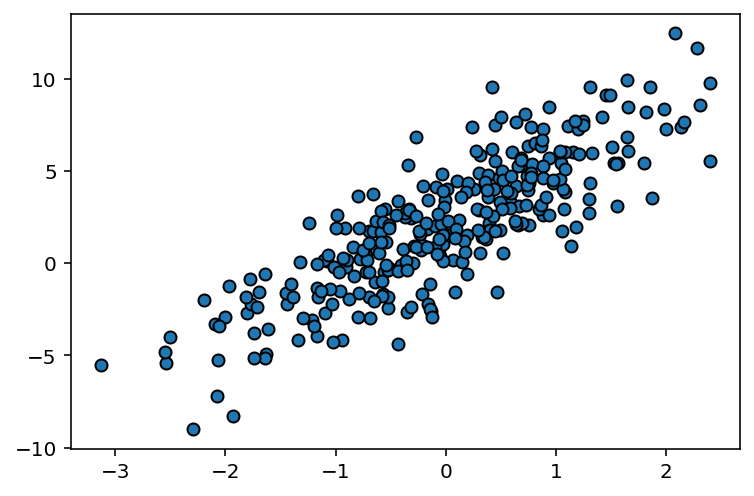

In [4]:
# 가상 데이터를 사용한 실습
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 300
x = tf.random.normal(shape=[NUM_EXAMPLES])
y = x * TRUE_W + TRUE_B + tf.random.normal(shape=[NUM_EXAMPLES], mean=0, stddev=2)
plt.scatter(x, y, edgecolor="black")
plt.show()

In [5]:
print(x.shape)
print(y.shape)

(300,)
(300,)


In [6]:
# 4. 케라스의 도입
import numpy as np
import tensorflow as tf

# 입력과 출력의 형태를 정의합니다.
input_ = tf.keras.layers.Input(shape=(1,)) # 독립 변수의 특성(컬럼)이 1개입니다.
output_ = tf.keras.layers.Dense(1)(input_)  # 종속 변수의 특성(컬럼)이 1개입니다.

# 모델을 생성합니다.
model = tf.keras.models.Model(input_, output_)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="mse")

# 주어진 데이터를 사용하여 학습을 수행합니다.
model.fit(x, y, epochs=1000)

Epoch 1/1000
10/10 [==============================] - 0s 771us/step - loss: 17.6966
Epoch 2/1000
10/10 [==============================] - 0s 642us/step - loss: 12.8720
Epoch 3/1000
10/10 [==============================] - 0s 618us/step - loss: 9.9102
Epoch 4/1000
10/10 [==============================] - 0s 659us/step - loss: 7.8697
Epoch 5/1000
10/10 [==============================] - 0s 597us/step - loss: 6.5613
Epoch 6/1000
10/10 [==============================] - 0s 573us/step - loss: 5.6651
Epoch 7/1000
10/10 [==============================] - 0s 578us/step - loss: 5.1362
Epoch 8/1000
10/10 [==============================] - 0s 542us/step - loss: 4.7752
Epoch 9/1000
10/10 [==============================] - 0s 610us/step - loss: 4.5337
Epoch 10/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.3667
Epoch 11/1000
10/10 [==============================] - 0s 649us/step - loss: 4.2729
Epoch 12/1000
10/10 [==============================] - 0s 696us/step - loss: 4.2041
E

10/10 [==============================] - 0s 538us/step - loss: 4.0574
Epoch 99/1000
10/10 [==============================] - 0s 513us/step - loss: 4.0579
Epoch 100/1000
10/10 [==============================] - 0s 556us/step - loss: 4.0589
Epoch 101/1000
10/10 [==============================] - 0s 611us/step - loss: 4.0578
Epoch 102/1000
10/10 [==============================] - 0s 546us/step - loss: 4.0604
Epoch 103/1000
10/10 [==============================] - 0s 559us/step - loss: 4.0596
Epoch 104/1000
10/10 [==============================] - 0s 571us/step - loss: 4.0592
Epoch 105/1000
10/10 [==============================] - 0s 590us/step - loss: 4.0604
Epoch 106/1000
10/10 [==============================] - 0s 525us/step - loss: 4.0633
Epoch 107/1000
10/10 [==============================] - 0s 570us/step - loss: 4.0599
Epoch 108/1000
10/10 [==============================] - 0s 743us/step - loss: 4.0581
Epoch 109/1000
10/10 [==============================] - 0s 538us/step - loss: 4.0

10/10 [==============================] - 0s 535us/step - loss: 4.0582
Epoch 195/1000
10/10 [==============================] - 0s 747us/step - loss: 4.0618
Epoch 196/1000
10/10 [==============================] - 0s 606us/step - loss: 4.0597
Epoch 197/1000
10/10 [==============================] - 0s 667us/step - loss: 4.0576
Epoch 198/1000
10/10 [==============================] - 0s 627us/step - loss: 4.0599
Epoch 199/1000
10/10 [==============================] - 0s 599us/step - loss: 4.0592
Epoch 200/1000
10/10 [==============================] - 0s 623us/step - loss: 4.0590
Epoch 201/1000
10/10 [==============================] - 0s 623us/step - loss: 4.0630
Epoch 202/1000
10/10 [==============================] - 0s 527us/step - loss: 4.0593
Epoch 203/1000
10/10 [==============================] - 0s 516us/step - loss: 4.0606
Epoch 204/1000
10/10 [==============================] - 0s 535us/step - loss: 4.0589
Epoch 205/1000
10/10 [==============================] - 0s 568us/step - loss: 4.

10/10 [==============================] - 0s 580us/step - loss: 4.0614
Epoch 291/1000
10/10 [==============================] - 0s 570us/step - loss: 4.0590
Epoch 292/1000
10/10 [==============================] - 0s 542us/step - loss: 4.0611
Epoch 293/1000
10/10 [==============================] - 0s 544us/step - loss: 4.0612
Epoch 294/1000
10/10 [==============================] - 0s 621us/step - loss: 4.0611
Epoch 295/1000
10/10 [==============================] - 0s 630us/step - loss: 4.0581
Epoch 296/1000
10/10 [==============================] - 0s 522us/step - loss: 4.0599
Epoch 297/1000
10/10 [==============================] - 0s 586us/step - loss: 4.0586
Epoch 298/1000
10/10 [==============================] - 0s 543us/step - loss: 4.0590
Epoch 299/1000
10/10 [==============================] - 0s 577us/step - loss: 4.0595
Epoch 300/1000
10/10 [==============================] - 0s 551us/step - loss: 4.0593
Epoch 301/1000
10/10 [==============================] - 0s 598us/step - loss: 4.

10/10 [==============================] - 0s 504us/step - loss: 4.0617
Epoch 387/1000
10/10 [==============================] - 0s 554us/step - loss: 4.0609
Epoch 388/1000
10/10 [==============================] - 0s 537us/step - loss: 4.0605
Epoch 389/1000
10/10 [==============================] - 0s 625us/step - loss: 4.0596
Epoch 390/1000
10/10 [==============================] - 0s 583us/step - loss: 4.0574
Epoch 391/1000
10/10 [==============================] - 0s 572us/step - loss: 4.0580
Epoch 392/1000
10/10 [==============================] - 0s 553us/step - loss: 4.0590
Epoch 393/1000
10/10 [==============================] - 0s 510us/step - loss: 4.0565
Epoch 394/1000
10/10 [==============================] - 0s 566us/step - loss: 4.0612
Epoch 395/1000
10/10 [==============================] - 0s 595us/step - loss: 4.0569
Epoch 396/1000
10/10 [==============================] - 0s 650us/step - loss: 4.0606
Epoch 397/1000
10/10 [==============================] - 0s 658us/step - loss: 4.

10/10 [==============================] - 0s 570us/step - loss: 4.0622
Epoch 483/1000
10/10 [==============================] - 0s 558us/step - loss: 4.0587
Epoch 484/1000
10/10 [==============================] - 0s 542us/step - loss: 4.0585
Epoch 485/1000
10/10 [==============================] - 0s 527us/step - loss: 4.0581
Epoch 486/1000
10/10 [==============================] - 0s 620us/step - loss: 4.0591
Epoch 487/1000
10/10 [==============================] - 0s 610us/step - loss: 4.0584
Epoch 488/1000
10/10 [==============================] - 0s 563us/step - loss: 4.0601
Epoch 489/1000
10/10 [==============================] - 0s 578us/step - loss: 4.0590
Epoch 490/1000
10/10 [==============================] - 0s 619us/step - loss: 4.0623
Epoch 491/1000
10/10 [==============================] - 0s 639us/step - loss: 4.0593
Epoch 492/1000
10/10 [==============================] - 0s 608us/step - loss: 4.0616
Epoch 493/1000
10/10 [==============================] - 0s 569us/step - loss: 4.

10/10 [==============================] - 0s 567us/step - loss: 4.0621
Epoch 579/1000
10/10 [==============================] - 0s 747us/step - loss: 4.0576
Epoch 580/1000
10/10 [==============================] - 0s 575us/step - loss: 4.0590
Epoch 581/1000
10/10 [==============================] - 0s 534us/step - loss: 4.0597
Epoch 582/1000
10/10 [==============================] - 0s 549us/step - loss: 4.0601
Epoch 583/1000
10/10 [==============================] - 0s 617us/step - loss: 4.0603
Epoch 584/1000
10/10 [==============================] - 0s 645us/step - loss: 4.0600
Epoch 585/1000
10/10 [==============================] - 0s 561us/step - loss: 4.0601
Epoch 586/1000
10/10 [==============================] - 0s 555us/step - loss: 4.0610
Epoch 587/1000
10/10 [==============================] - 0s 548us/step - loss: 4.0595
Epoch 588/1000
10/10 [==============================] - 0s 535us/step - loss: 4.0611
Epoch 589/1000
10/10 [==============================] - 0s 524us/step - loss: 4.

10/10 [==============================] - 0s 601us/step - loss: 4.0586
Epoch 675/1000
10/10 [==============================] - 0s 634us/step - loss: 4.0596
Epoch 676/1000
10/10 [==============================] - 0s 544us/step - loss: 4.0580
Epoch 677/1000
10/10 [==============================] - 0s 580us/step - loss: 4.0559
Epoch 678/1000
10/10 [==============================] - 0s 541us/step - loss: 4.0585
Epoch 679/1000
10/10 [==============================] - 0s 627us/step - loss: 4.0587
Epoch 680/1000
10/10 [==============================] - 0s 593us/step - loss: 4.0575
Epoch 681/1000
10/10 [==============================] - 0s 522us/step - loss: 4.0587
Epoch 682/1000
10/10 [==============================] - 0s 590us/step - loss: 4.0589
Epoch 683/1000
10/10 [==============================] - 0s 557us/step - loss: 4.0615
Epoch 684/1000
10/10 [==============================] - 0s 574us/step - loss: 4.0584
Epoch 685/1000
10/10 [==============================] - 0s 565us/step - loss: 4.

10/10 [==============================] - 0s 547us/step - loss: 4.0582
Epoch 771/1000
10/10 [==============================] - 0s 502us/step - loss: 4.0580
Epoch 772/1000
10/10 [==============================] - 0s 512us/step - loss: 4.0581
Epoch 773/1000
10/10 [==============================] - 0s 570us/step - loss: 4.0587
Epoch 774/1000
10/10 [==============================] - 0s 511us/step - loss: 4.0581
Epoch 775/1000
10/10 [==============================] - 0s 511us/step - loss: 4.0590
Epoch 776/1000
10/10 [==============================] - 0s 550us/step - loss: 4.0591
Epoch 777/1000
10/10 [==============================] - 0s 586us/step - loss: 4.0582
Epoch 778/1000
10/10 [==============================] - 0s 545us/step - loss: 4.0559
Epoch 779/1000
10/10 [==============================] - 0s 565us/step - loss: 4.0585
Epoch 780/1000
10/10 [==============================] - 0s 670us/step - loss: 4.0586
Epoch 781/1000
10/10 [==============================] - 0s 579us/step - loss: 4.

10/10 [==============================] - 0s 543us/step - loss: 4.0591
Epoch 867/1000
10/10 [==============================] - 0s 549us/step - loss: 4.0597
Epoch 868/1000
10/10 [==============================] - 0s 534us/step - loss: 4.0601
Epoch 869/1000
10/10 [==============================] - 0s 671us/step - loss: 4.0589
Epoch 870/1000
10/10 [==============================] - 0s 603us/step - loss: 4.0573
Epoch 871/1000
10/10 [==============================] - 0s 607us/step - loss: 4.0599
Epoch 872/1000
10/10 [==============================] - 0s 602us/step - loss: 4.0605
Epoch 873/1000
10/10 [==============================] - 0s 551us/step - loss: 4.0605
Epoch 874/1000
10/10 [==============================] - 0s 576us/step - loss: 4.0604
Epoch 875/1000
10/10 [==============================] - 0s 573us/step - loss: 4.0577
Epoch 876/1000
10/10 [==============================] - 0s 554us/step - loss: 4.0572
Epoch 877/1000
10/10 [==============================] - 0s 621us/step - loss: 4.

10/10 [==============================] - 0s 563us/step - loss: 4.0606
Epoch 963/1000
10/10 [==============================] - 0s 580us/step - loss: 4.0599
Epoch 964/1000
10/10 [==============================] - 0s 680us/step - loss: 4.0569
Epoch 965/1000
10/10 [==============================] - 0s 540us/step - loss: 4.0584
Epoch 966/1000
10/10 [==============================] - 0s 649us/step - loss: 4.0608
Epoch 967/1000
10/10 [==============================] - 0s 586us/step - loss: 4.0592
Epoch 968/1000
10/10 [==============================] - 0s 559us/step - loss: 4.0580
Epoch 969/1000
10/10 [==============================] - 0s 628us/step - loss: 4.0601
Epoch 970/1000
10/10 [==============================] - 0s 614us/step - loss: 4.0597
Epoch 971/1000
10/10 [==============================] - 0s 564us/step - loss: 4.0597
Epoch 972/1000
10/10 [==============================] - 0s 613us/step - loss: 4.0586
Epoch 973/1000
10/10 [==============================] - 0s 551us/step - loss: 4.

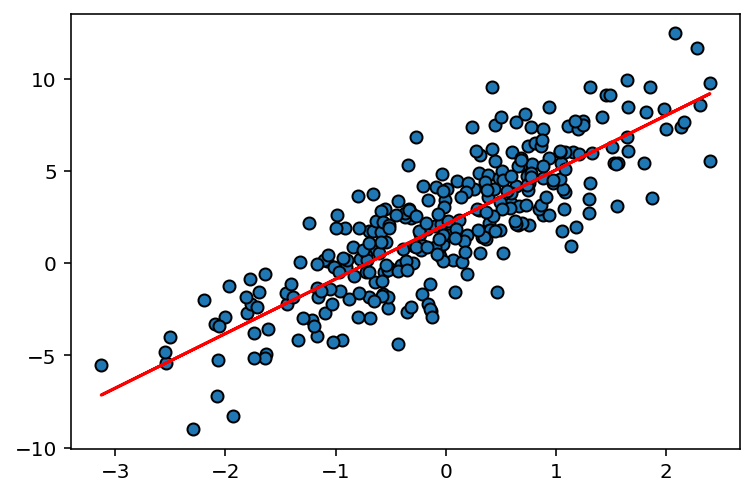

In [7]:
plt.scatter(x, y, edgecolor="black")

pred = model.predict(x)
plt.plot(x, pred, color="red")
plt.show()